## 1.IMPORTING LIBRARIES

    *Numpy for linear algebra and data manipulation.
    *Matplotlib for visualising data.
    *Pandas for loading and analyzing data.
    *Sklearn for normalizing the data and creating the model.

In [70]:
import numpy as np
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 2.LOADING AND ANALYZING THE DATA

    *Loading the drug_dataset.csv dataset.
    *The dataset is composed of attributes of patients and different medications.
    *Analyzing the data using pandas.

In [71]:
df = pd.read_csv("drug_dataset.csv")
unique_prohibited_drugs = df["Prohibited_Drugs"].unique()

print(unique_prohibited_drugs)
df.head()

['Ibuprofen' 'None' 'Ibuprofen Naproxen' 'Lisinopril Simvastatin'
 'Aspirin Ibuprofen Naproxen' 'NSAIDs' 'Warfarin Ibuprofen'
 'Digoxin Naproxen' 'Methotrexate Aspirin' 'Dipyridamole Celecoxib'
 'Diclofenac Dipyridamole' 'Naproxen Ticlopidine' 'Aspirin Warfarin'
 'Ibuprofen Celecoxib']


,Age,Sex,BP,Cholesterol,Na_to_K,Drugs_Taken,Prohibited_Drugs
0,35,M,HIGH,HIGH,2.5,Aspirin,Ibuprofen
1,52,F,NORMAL,HIGH,3.2,Lisinopril,None
2,45,M,LOW,NORMAL,2.9,None,Ibuprofen Naproxen
3,68,F,HIGH,HIGH,2.1,Aspirin,None
4,30,M,NORMAL,NORMAL,3.8,Naproxen,Lisinopril Simvastatin


In [72]:
print("The dataset consists of {} patients and {} features.".format(df.shape[0], df.shape[1]))

The dataset consists of 33 patients and 7 features.


In [73]:
# Import the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("drug_dataset.csv")

# Split the dataset into features and target variable
X = df.drop(["Prohibited_Drugs"], axis=1)
y = df["Prohibited_Drugs"]

# Encode categorical features
cat_features = ["Sex", "BP", "Cholesterol", "Drugs_Taken"]
for feature in cat_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Train the decision tree model
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

Let's create independent and dependent variable matrices.

In [104]:
X = df[["Age", "Sex", "BP", "Cholesterol", "Na_to_K" , "Drugs_Taken" ]].values
y = df["Prohibited_Drugs"].values

print("Independent variable matrix:\n{}\n\n Dependent variable matrix:\n{}".format(X[:3], y[:3]))

Independent variable matrix:
[[35 'M' 'HIGH' 'HIGH' 2.5 'Aspirin']
 [52 'F' 'NORMAL' 'HIGH' 3.2 'Lisinopril']
 [45 'M' 'LOW' 'NORMAL' 2.9 'None']]

 Dependent variable matrix:
['Ibuprofen' 'None' 'Ibuprofen Naproxen']


Since there are non-numerical values, we must convert them before training the model with them.

In [105]:
print("Non-numerical columns: {}\n".format(X[1][1:4]))

#For second column:
converter = sklearn.preprocessing.LabelEncoder()
converter.fit(['F', 'M'])
X[:,1] = converter.transform(X[:,1])

converter = sklearn.preprocessing.LabelEncoder()
converter.fit(["LOW", "NORMAL", "HIGH"])
X[:,2] = converter.transform(X[:,2])

converter = sklearn.preprocessing.LabelEncoder()
converter.fit(["NORMAL", "HIGH"])
X[:,3] = converter.transform(X[:,3])

converter = sklearn.preprocessing.LabelEncoder()
converter.fit(['Aspirin', 'Hydrochlorothiazide','Lisinopril', 'Atorvastatin', 'Naproxen', 'None', 'Amlodipine','Losartan', 'Valsartan', 'Metoprolol', 'Carvedilol', 'Nifedipine', 'Simvastatin', 'Lovastatin', 'Rosuvastatin','Pravastatin', 'Ezetimibe', 'Fluvastatin'])
X[:,5] = converter.transform(X[:,5])
print("Transformed dataset:\n{}".format(X[:3]))

Non-numerical columns: ['F' 'NORMAL' 'HIGH']

Transformed dataset:
[[35 1 0 0 2.5 1]
 [52 0 2 0 3.2 7]
 [45 1 1 1 2.9 13]]


## 3.PREPARING AND SPLITTING DATA

    *Converting type of the data
    *Normalizing the data
    *Splitting train and test sets.

In [106]:
training_X, test_X, training_y, test_y = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

print("Training data consists of {} patients having {} features.".format(training_X.shape[0], training_X.shape[1]))
print("Test data consists of {} patients having 5 features.".format(test_X.shape[0]))

Training data consists of 24 patients having 6 features.
Test data consists of 9 patients having 5 features.


## 4.CREATING and EVALUATING the MODEL

    *Creating the model using sklearn.
    *Decision tree algorithm is used for picking the most appropriate features and mapping them to the drugs.
    *Evaluating with accuracy metric. Accuracy is 100%.
    *Plotting the tree.

In [107]:
model = sklearn.tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(training_X, training_y)

predictions = model.predict(test_X)

#Let's see if our predictions are true:
print("Real labels: {}\nPredicted labels: {}".format(test_y[:5], predictions[:5]))

Real labels: ['Methotrexate Aspirin' 'Aspirin Ibuprofen Naproxen' 'None' 'Ibuprofen'
 'Digoxin Naproxen']
Predicted labels: ['Ibuprofen Naproxen' 'Aspirin Ibuprofen Naproxen' 'None'
 'Ibuprofen Celecoxib' 'Digoxin Naproxen']


The first five predictions turn out to be true. We can find its accuracy with a line of code.

In [108]:
from sklearn import metrics
print("Accuracy of our model: %.2f" %metrics.accuracy_score(test_y, predictions))

Accuracy of our model: 0.56


Finally, let's take a look how our decision tree looks like.

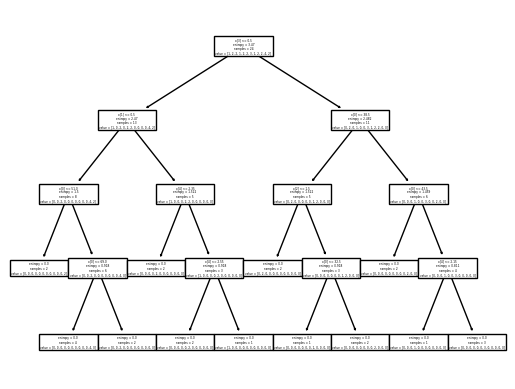

In [109]:
sklearn.tree.plot_tree(model)
plt.show()

In [115]:
# Take user input for a patient's attributes
age = int(input("Enter patient age: "))
sex = input("Enter patient sex (M or F): ")
bp = input("Enter patient blood pressure (LOW, NORMAL, or HIGH): ")
chol = input("Enter patient cholesterol level (NORMAL or HIGH): ")
na_to_k = float(input("Enter patient sodium to potassium ratio: "))

# Take user input for the drugs taken by the patient
drugs_taken = input("Enter drugs taken (comma separated): ")
drugs_taken = [x.strip() for x in drugs_taken.split(",")]
converter_drug = sklearn.preprocessing.LabelEncoder()
converter_drug.fit(['Aspirin', 'Hydrochlorothiazide','Lisinopril', 'Atorvastatin', 'Naproxen', 'None', 'Amlodipine','Losartan', 'Valsartan', 'Metoprolol', 'Carvedilol', 'Nifedipine', 'Simvastatin', 'Lovastatin', 'Rosuvastatin','Pravastatin', 'Ezetimibe', 'Fluvastatin'])

# Define and fit transformers for non-numerical columns
converter_sex = sklearn.preprocessing.LabelEncoder()
converter_sex.fit(['F', 'M'])

converter_bp = sklearn.preprocessing.LabelEncoder()
converter_bp.fit(['LOW', 'NORMAL', 'HIGH'])

converter_chol = sklearn.preprocessing.LabelEncoder()
converter_chol.fit(['NORMAL', 'HIGH'])

# Encode user input
sex = converter_sex.transform([sex])[0]
bp = converter_bp.transform([bp])[0]
chol = converter_chol.transform([chol])[0]
drugs_taken = converter_drug.transform([drugs_taken])[0]
# Create input dictionary for the model
input_dict = {"Age": age, "Sex": sex, "BP": bp, "Cholesterol": chol, "Na_to_K": na_to_k, "Drugs_Taken": drugs_taken}
input_df = pd.DataFrame(input_dict, index=[0])

# Predict the prohibited drug
prohibited_drug = model.predict(input_df)[0]

# Print drug recommendation
print("Prohibited drug for patient:\n", prohibited_drug)


Enter patient age: 35
Enter patient sex (M or F): M
Enter patient blood pressure (LOW, NORMAL, or HIGH): NORMAL
Enter patient cholesterol level (NORMAL or HIGH): NORMAL
Enter patient sodium to potassium ratio: 2.5
Enter drugs taken (comma separated): Simvastatin
Prohibited drug for patient:
 NSAIDs


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## 5.CONCLUSIONS

    *Since all of the predicted labels match the true labels, this model is very accurate.
    *In problems that we can build a decision tree, this algorithm performs well.
    *As we can see entropy converges to 0 when the tree is finalized. Leow entropy means less impurity and more predictionability.  